In [118]:
import numpy as np
with open('data0.txt','r') as f:
    rows=[map(int,L.strip().split(' ')) for L in f]

arr=np.array(rows)
datapoint = np.array(arr[:,:2])
label = np.array(arr[:,2])

In [126]:
from sklearn.linear_model import Perceptron
pt=Perceptron()
pt.fit(datapoint,label)
print(pt.coef_)
print(pt.intercept_)

[[ -3. -12.]
 [-30.  10.]
 [ 12. -21.]
 [  4.   7.]]
[ 22.  -5.  -7. -30.]


In [111]:
def getPredictedLabel(w,b,x):
    predictedlabel = 0
    argmax = np.dot(w[0],x) + b[0]
    for i in range(len(b)):
        currargval = np.dot(w[i],x) + b[i]
        if(currargval > argmax):
            predictedlabel = i
            argmax = currargval
    return predictedlabel;

In [112]:
from operator import add,sub
def chargeLabels(w,b,x,predicted,actual):
    w[actual] = map(add,w[actual],x)
    b[actual] = b[actual] + 1
    w[predicted] = map(sub,w[predicted],x)
    b[predicted] = b[predicted] - 1

In [113]:
import random
def iteration(tuple,w,b):
    random.shuffle(tuple)
    anyupdate = 0
    for i in range(len(tuple)):
        predictlabel = getPredictedLabel(w,b,tuple[i][:2])
        if(predictlabel != tuple[i][2]):
            chargeLabels(w,b,tuple[i][:2],predictlabel,tuple[i][2])
            anyupdate = 1
    return (w,b,anyupdate)

In [114]:
w = [[0,0],[0,0],[0,0],[0,0]]
b = [0,0,0,0]
r = (w,b,1)
some = 0
while(r[2] != 0):
    print(some)
    some = some + 1
    r = iteration(arr,w,b)
    w = r[0]
    b = r[1]
print(w)
print(b)

0
1
2
[[6, 0], [-11, 7], [3, -8], [2, 1]]
[7, -1, -1, -5]


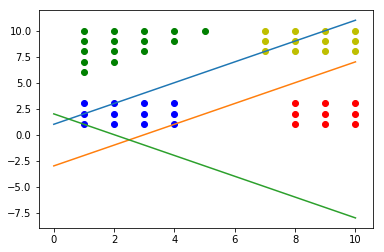

In [134]:
import matplotlib.pyplot as plt
points0 = zip(*datapoint[0:12])
points1 = zip(*datapoint[12:27])
points2 = zip(*datapoint[27:36])
points3 = zip(*datapoint[36:])
plt.scatter(*points0,c='b')
plt.scatter(*points1,c='g')
plt.scatter(*points2,c='r')
plt.scatter(*points3,c='y')
x = np.linspace(0,10,100)
y = (27/22)*x+27/22
plt.plot(x,y)
y = (15/9)*x-29/9
plt.plot(x,y)
y = (-7/19)*x+52/19
plt.plot(x,y)
#y = (42/31)*x-2/31
#plt.plot(x,y)
#y = (8/28)*x+23/28
#plt.plot(x,y)
#x = np.linspace(0,2,100)
#y = (34/3)*x-25/3
#plt.plot(x,y)
plt.show()